<a href="https://colab.research.google.com/github/NoahCorlew/CAP4630-Homework/blob/master/CAP4630_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

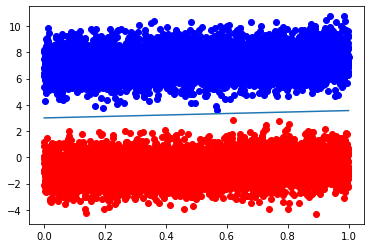

In [688]:
import numpy
import time
import math
import random
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import rand
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.patches as mpatches

def get_random_data(w, b, mu, sigma, m):
  data = numpy.zeros((m,2))
  labels = numpy.zeros((m,1))

  # Looping m times to calculate x1 and x2
  for i in range(m):
    x1 = rand(1)

    randn = rand(1)
    if (randn >= .5):
      c = 0
    if (randn < .5):
      c = 1

    n = numpy.random.normal(mu, sigma)
    x2 = w * x1 + b + ((-1)**c) * n

    data[i][0] = x1
    data[i][1] = x2
    labels[i] = c

  display_random_data(data, labels, w, b)

  return data, labels


def display_random_data (data, labels, w, b):
  data_c0 = [] # Red dots
  data_c1 = [] # Blue dots

  i = 0
  while i != len(labels):
    if labels[i] == 0:
      data_c0.append(data[i])
    if labels[i] == 1:
      data_c1.append(data[i])
    i += 1

  # Separates out the x and y values from the tuples to be plotted on the scatter plot
  data_c0_x = [val[0] for val in data_c0]
  data_c0_y = [val[1] for val in data_c0]

  data_c1_x = [val[0] for val in data_c1]
  data_c1_y = [val[1] for val in data_c1]

  plt.scatter(data_c0_x, data_c0_y, c = "blue")
  plt.scatter(data_c1_x, data_c1_y, c = "red")

  x = numpy.linspace(0,1,100)
  y = w * x + b
  plt.plot(x , y)
  
  plt.show()


wIn = numpy.random.default_rng().uniform(0,1)
bIn = 3
muIn = 4
sigmaIn = 1
mIn = 10000

data, labels = get_random_data(wIn, bIn, muIn, sigmaIn, mIn)

Split the data/labels into a training set (80%) and a test set (20%).

In [0]:
split = int (len(data) * .2)
test_data, training_data = data[:split], data[split:]
test_labels, training_labels = labels[:split], labels[split:]

# Problem 2 Helper Functions

In [0]:
# This function is used later in problem 3 as well
def plot_random_data_with_lines(labels, data, weights, bias, wIn, bIn):

  x1_blue = []
  x2_blue = []
  x1_red = []
  x2_red = []

  for i in range(len(data)):
    c = labels[i]

    if (c == 0):
      x1_blue.append(data[i,0])
      x2_blue.append(data[i,1])
    else:
      x1_red.append(data[i,0])
      x2_red.append(data[i,1])
  
  plt.plot(x1_blue, x2_blue, "b.")
  plt.plot(x1_red, x2_red, "r.")

  # predicted Line
  px1 = numpy.linspace(0, 1, 100)
  px2 = (-1 * (weights[0] * px1) - bias) / weights[1] 
  plt.plot(px1, px2, "-k")

  # actual Line
  ax1 = numpy.linspace(0, 1, 100)
  ax2 = wIn * ax1 + bIn
  plt.plot(ax1, ax2, "-g")

  actual_line = mpatches.Patch(color = "green", label = "Actual")
  predicted_line = mpatches.Patch(color = "black", label = "Predicted")
  plt.legend(handles = [actual_line, predicted_line])

  return max(x2_blue), min(x2_red)


# Problem 2 Training


In [691]:
# Build
model = tf.keras.models.Sequential()

layers = tf.keras.layers.Dense(1, activation = "sigmoid", input_shape = (2,))
model.add(layers)

weights = layers.get_weights()


# Compile
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.005), loss = "binary_crossentropy", metrics = ["accuracy"])


# Train and Display
print(weights)

model.fit(training_data, training_labels, epochs = 80, batch_size = 500)

print(model.evaluate(test_data, test_labels))

[array([[-0.84642404],
       [ 1.0411984 ]], dtype=float32), array([0.], dtype=float32)]
Epoch 1/80
16/16 [==============================] - 0s 1ms/step - loss: 4.0624 - accuracy: 0.0495
Epoch 2/80
16/16 [==============================] - 0s 1ms/step - loss: 3.6734 - accuracy: 0.0351
Epoch 3/80
16/16 [==============================] - 0s 1ms/step - loss: 3.3377 - accuracy: 0.0237
Epoch 4/80
16/16 [==============================] - 0s 1ms/step - loss: 3.0141 - accuracy: 0.0150
Epoch 5/80
16/16 [==============================] - 0s 1ms/step - loss: 2.6970 - accuracy: 0.0077
Epoch 6/80
16/16 [==============================] - 0s 1ms/step - loss: 2.3870 - accuracy: 0.0039
Epoch 7/80
16/16 [==============================] - 0s 1ms/step - loss: 2.0905 - accuracy: 0.0012
Epoch 8/80
16/16 [==============================] - 0s 1ms/step - loss: 1.8161 - accuracy: 2.5000e-04
Epoch 9/80
16/16 [==============================] - 0s 2ms/step - loss: 1.5674 - accuracy: 0.0011
Epoch 10/80
16/16 [=====

# Problem 2 Plots

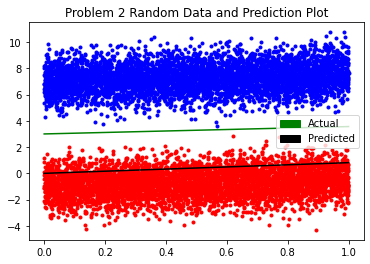

Test set accuracy: 0.062


In [692]:
ymax, ymin = plot_random_data_with_lines(labels, data, weights[0], weights[1], wIn, bIn)

px1, px2 = numpy.meshgrid(numpy.linspace(0, 1), numpy.linspace(ymin, ymax))

plt.title("Problem 2 Random Data and Prediction Plot")
plt.show()


# Computing accuracy
def sigmoid_function(z):
  return 1 / (1 + math.exp(-1 * z))

bias = numpy.zeros(1)

c = 0
loss = 0
for i in range(len(test_data)):
  a = sigmoid_function(test_data[i].dot(weights[0]) + bias)
  if (a < .5 and test_labels[i] == 0) or (a >= .5 and test_labels[i] == 1):
      c = c + 1

ac = c / len(test_data)

print("Test set accuracy: " + str(ac))

Heatmap to visualize the function f : R^2 -> R

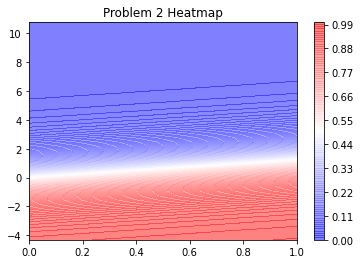

In [693]:
z = weights[0][1] * px1 + weights[0][0] * px2 + weights[1] 
p = 1.0 / (1.0 + numpy.exp(numpy.negative(z)))

plt.contourf(px1, px2, p, 100, cmap = "bwr", alpha = 0.5, zorder = -1)
plt.ylim(ymin, ymax)
plt.colorbar()
plt.title("Problem 2 Heatmap")
plt.show()


*How well does the trained model separate the red and blue dots?*

The trained model does not separate the red and blue dots correctly


# Problem 3 Training
 

In [0]:
learning_rate = 0.01
epochs = 80

weights = numpy.random.randn(2)
bias = numpy.zeros(1)

for epoch in range(epochs):

  shuffled_indices = numpy.random.permutation(len(data))

  for i in range(len(data)):
    a = sigmoid_function(data[i].dot(weights) + bias)
    loss = -1 * labels[i] * math.log(a, 10) - (1-labels[i])
    
    bias_gradient = a - labels[i]
    weight_gradient = bias_gradient * data[i]
    
    weights = weights - learning_rate * weight_gradient
    bias = bias - learning_rate * bias_gradient

# Problem 3 Plots

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

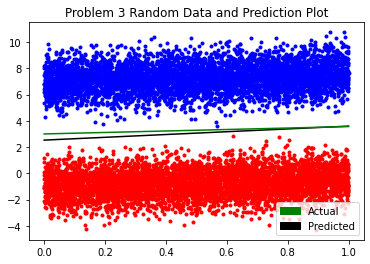

In [695]:
ymax, ymin = plot_random_data_with_lines(labels, data, weights, bias, wIn, bIn)
plt.title("Problem 3 Random Data and Prediction Plot")
plt.show()

Use a heatmap to visualize the function defined by your trained model

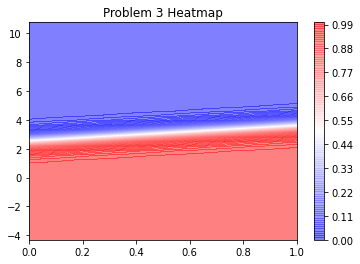

In [696]:
x1r = numpy.linspace(0, 1)
x2r = numpy.linspace(ymin, ymax)
x1, x2 = numpy.meshgrid(x1r, x2r)

z = weights[0] * x1 + weights[1] * x2 + bias
p = 1.0 / (1.0 + numpy.exp(numpy.negative(z)))

plt.contourf(x1, x2, p, 100, cmap = "bwr", alpha = 0.5, zorder = -1)
plt.colorbar()
plt.title("Problem 3 Heatmap")
plt.show()

Compute the binary cross entropy loss and accuracy on the test set.

In [697]:
c = 0
for i in range(len(test_data)):

  a = sigmoid_function(test_data[i].dot(weights) + bias)
  loss = loss - (test_labels[i] * math.log(a, 2)) - ((1-test_labels[i]) * math.log(a, 2))
  
  if (a < .5 and test_labels[i] == 0) or (a >= .5 and test_labels[i] == 1):
      c = c + 1

bcel = loss[0] / len(test_data)
ac = c / len(test_data)

print("Test set binary cross entropy loss: " + str(bcel))
print("Test set accuracy: " + str(ac))

Test set binary cross entropy loss: 9.812453838109077
Test set accuracy: 1.0
